In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import shap
from shap import TreeExplainer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from flask import Flask, render_template, request
import pickle
import joblib

In [56]:
data = pd.read_csv("student-mat.csv",sep=";")

In [57]:
#Exploratory Data Analysis

In [58]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [59]:
print(data.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [60]:
len(data)

395

In [61]:
data.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [62]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [63]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [64]:
#Checking the duplicate data
data.duplicated().sum()

0

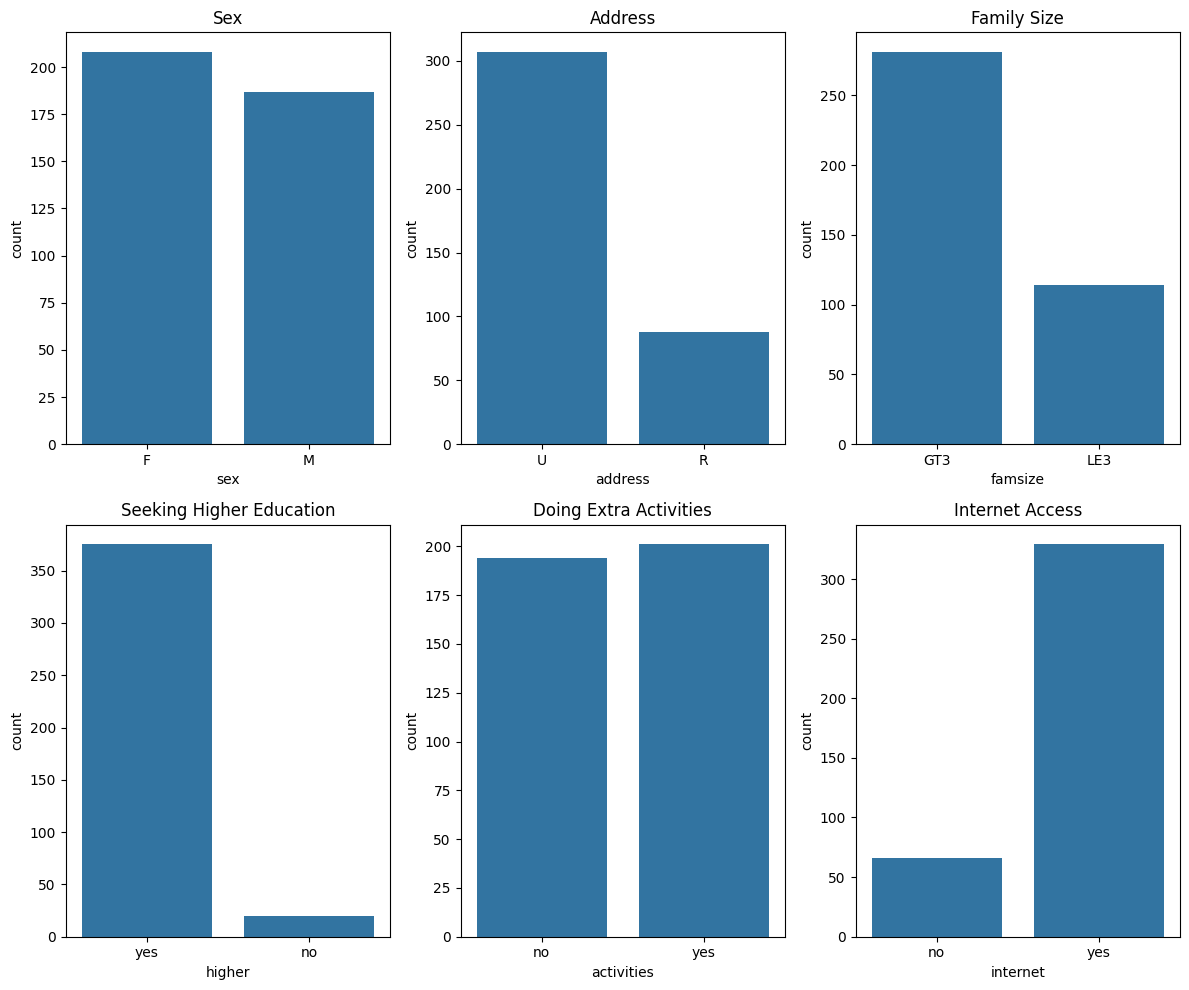

In [65]:
#creating subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))

# Plotting countplots for selected attributes
sns.countplot(x='sex', data=data, ax=axes[0, 0])
sns.countplot(x='address', data=data, ax=axes[0, 1])
sns.countplot(x='famsize', data=data, ax=axes[0, 2])
sns.countplot(x='higher', data=data, ax=axes[1, 0])
sns.countplot(x='activities', data=data, ax=axes[1, 1])
sns.countplot(x='internet', data=data, ax=axes[1, 2])

# Adding titles
axes[0, 0].set_title('Sex')
axes[0, 1].set_title('Address')
axes[0, 2].set_title('Family Size')
axes[1, 0].set_title('Seeking Higher Education')
axes[1, 1].set_title('Doing Extra Activities')
axes[1, 2].set_title('Internet Access')

# Adjusting layout
plt.tight_layout()
plt.show()



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



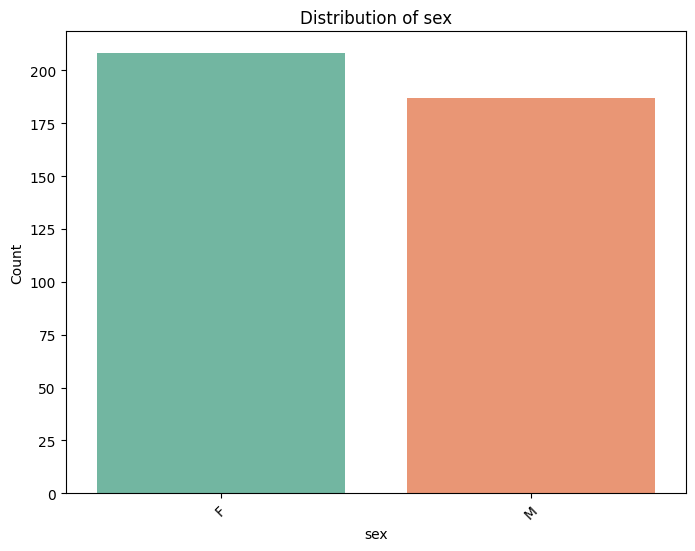



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



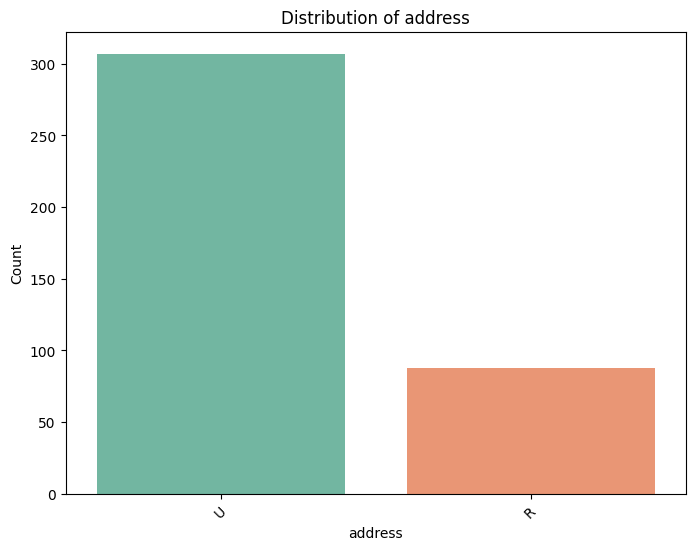



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



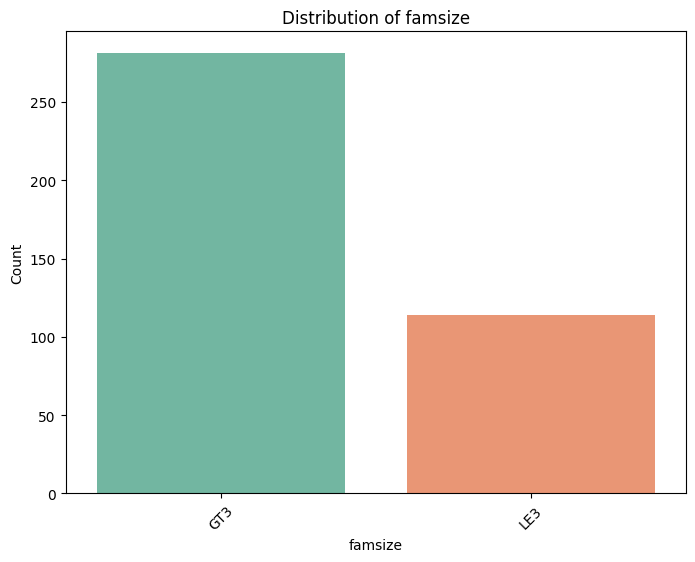



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



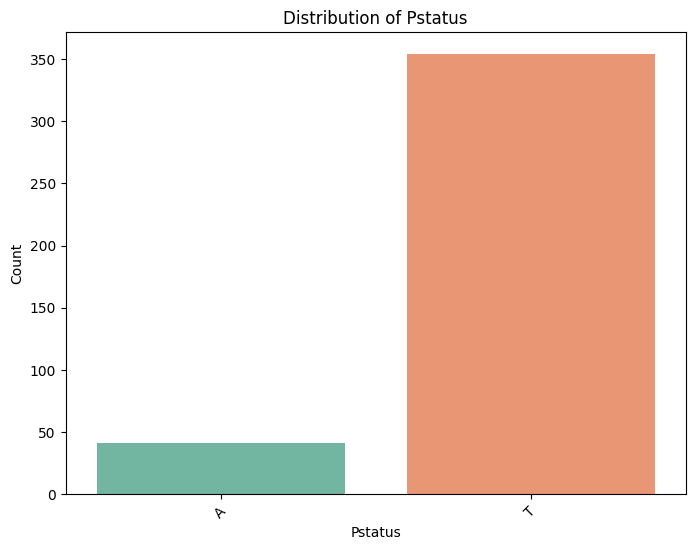



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



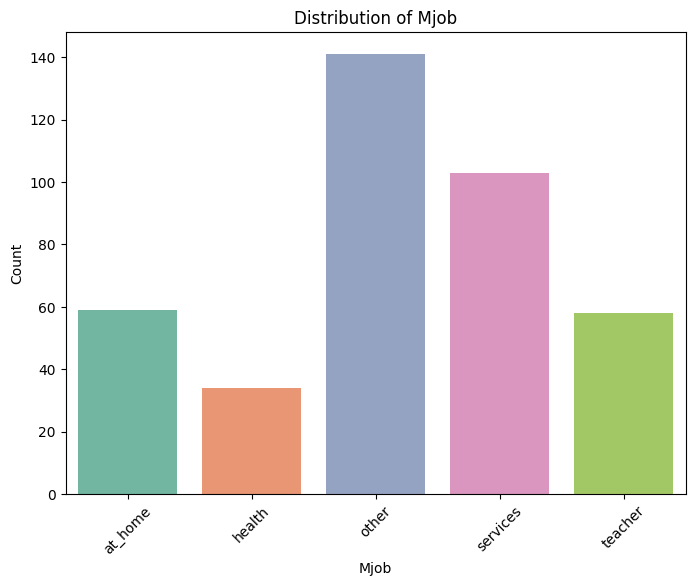



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



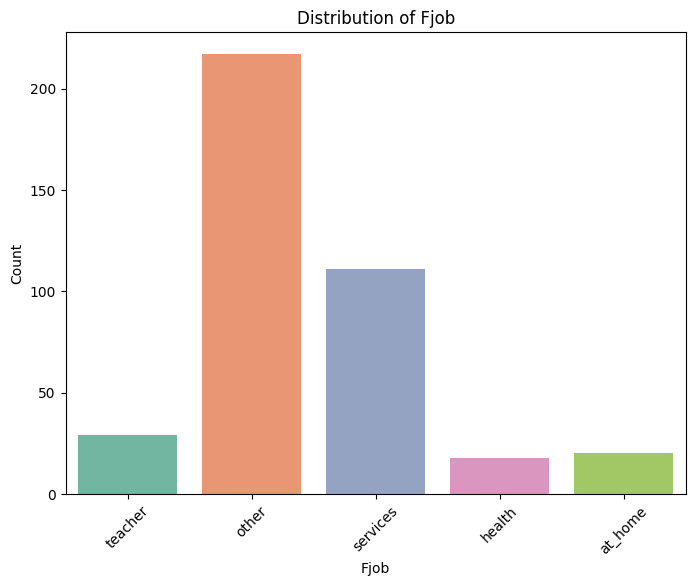



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



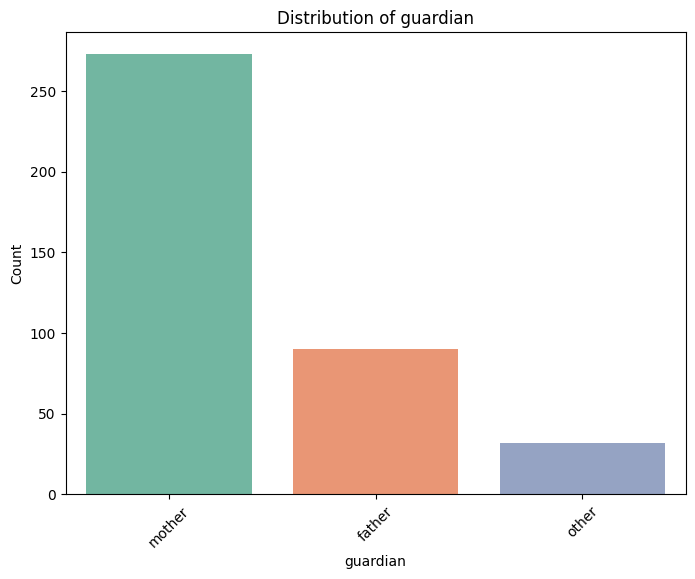



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



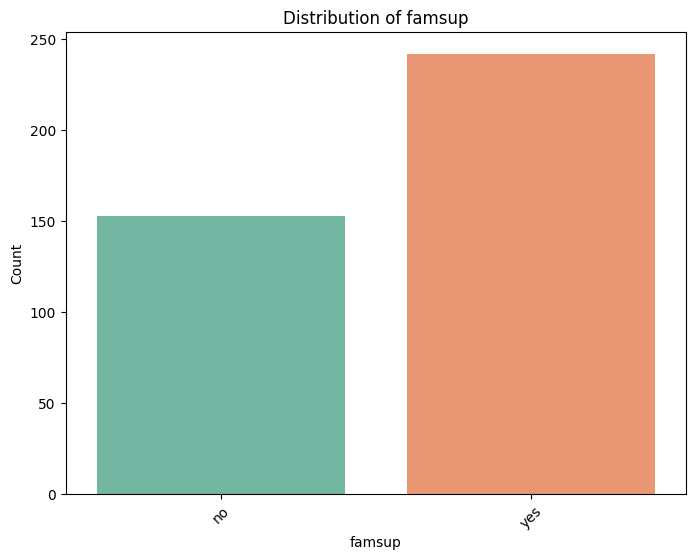



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



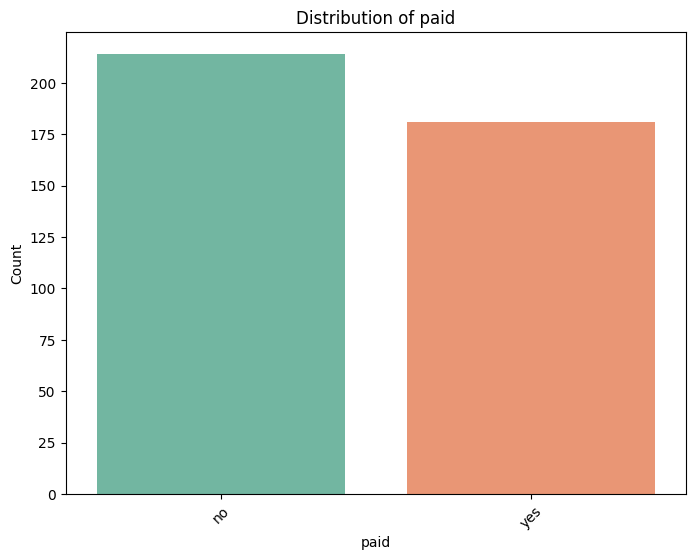



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



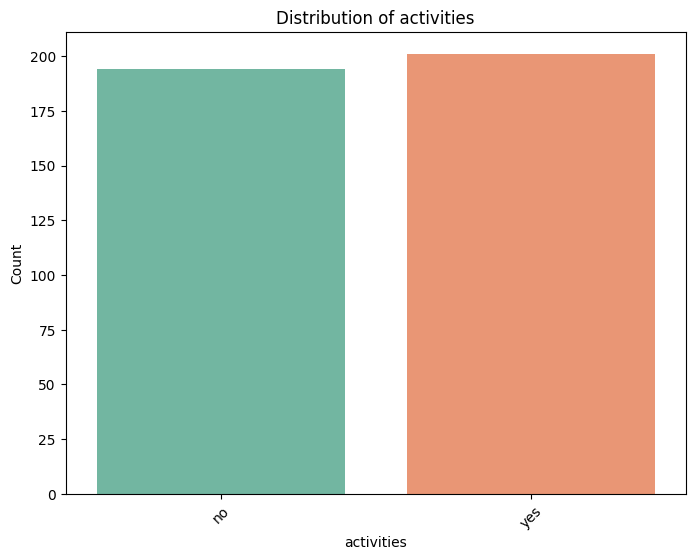



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



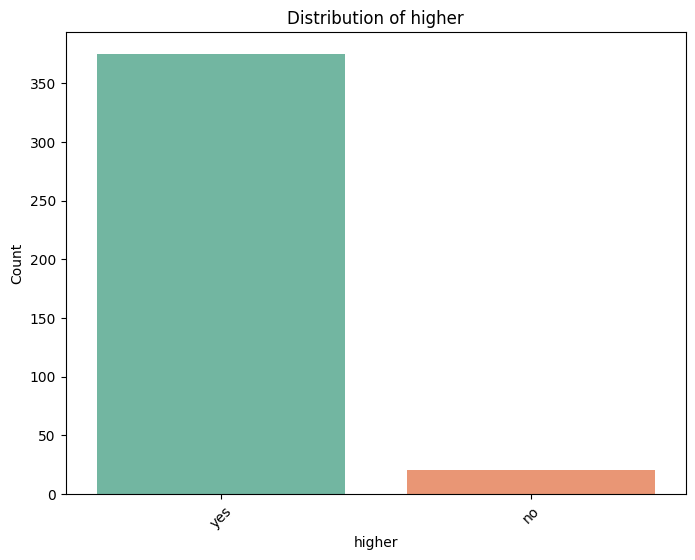



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



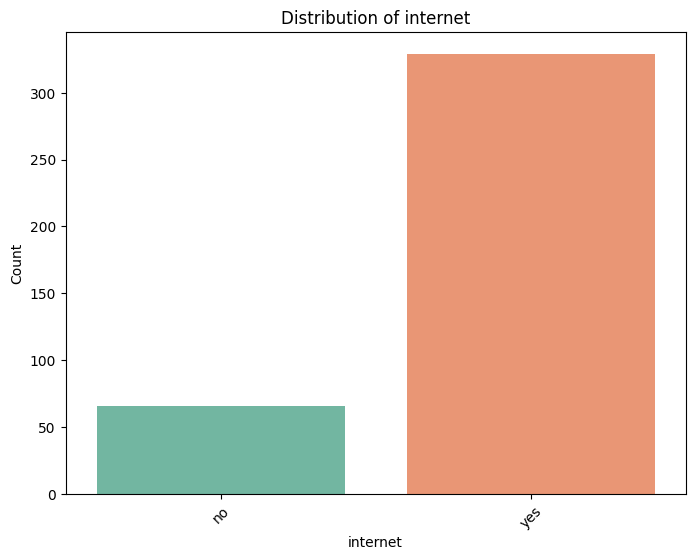

In [66]:
# Visualize the distribution of categorical variables
categorical_vars = ['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'guardian', 'famsup', 'paid', 'activities', 'higher', 'internet']
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, data=data, palette='Set2')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

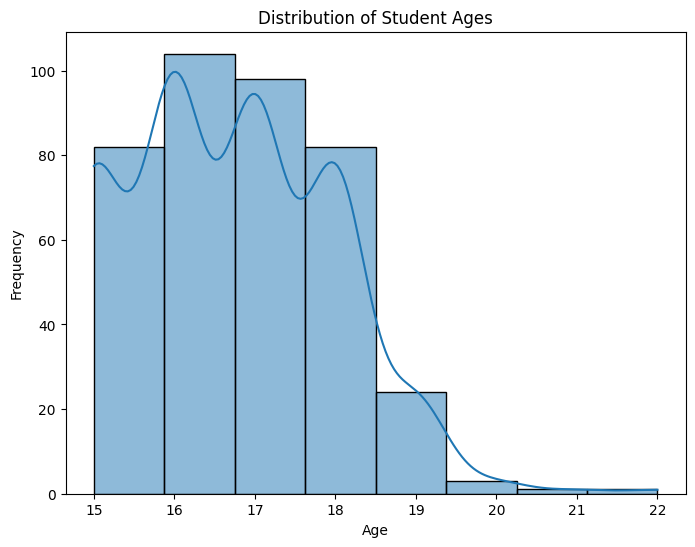

In [67]:
#Plot the distribution of student ages.
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=8, kde=True)
plt.title('Distribution of Student Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


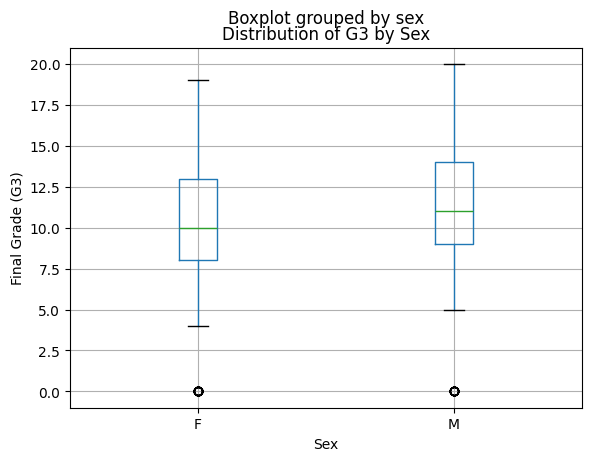

In [68]:
data.boxplot(by='sex', column='G3')
plt.xlabel('Sex')
plt.ylabel('Final Grade (G3)')
plt.title('Distribution of G3 by Sex')
plt.show()


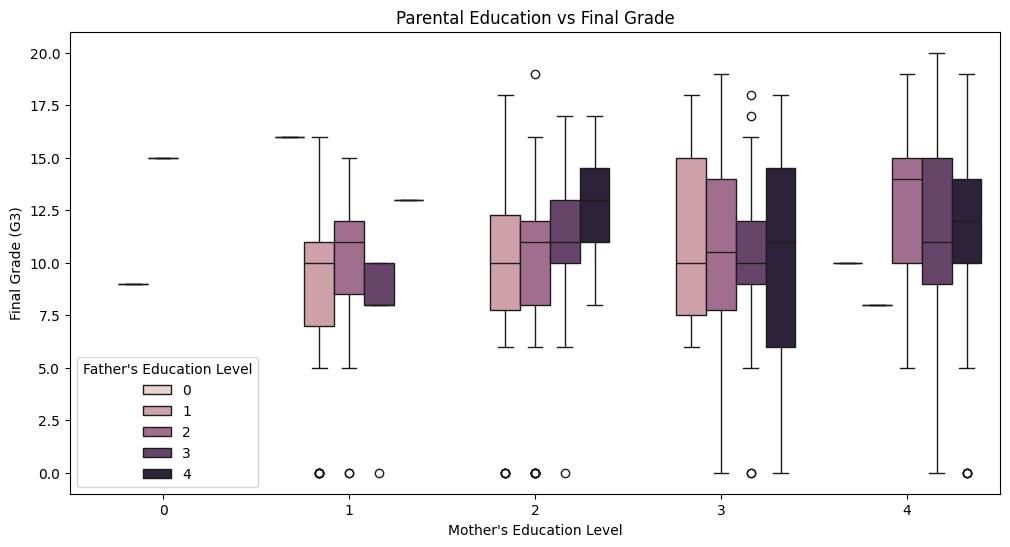

In [69]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Medu', y='G3', data=data, hue='Fedu')
plt.title('Parental Education vs Final Grade')
plt.xlabel("Mother's Education Level")
plt.ylabel('Final Grade (G3)')
plt.legend(title="Father's Education Level")
plt.show()


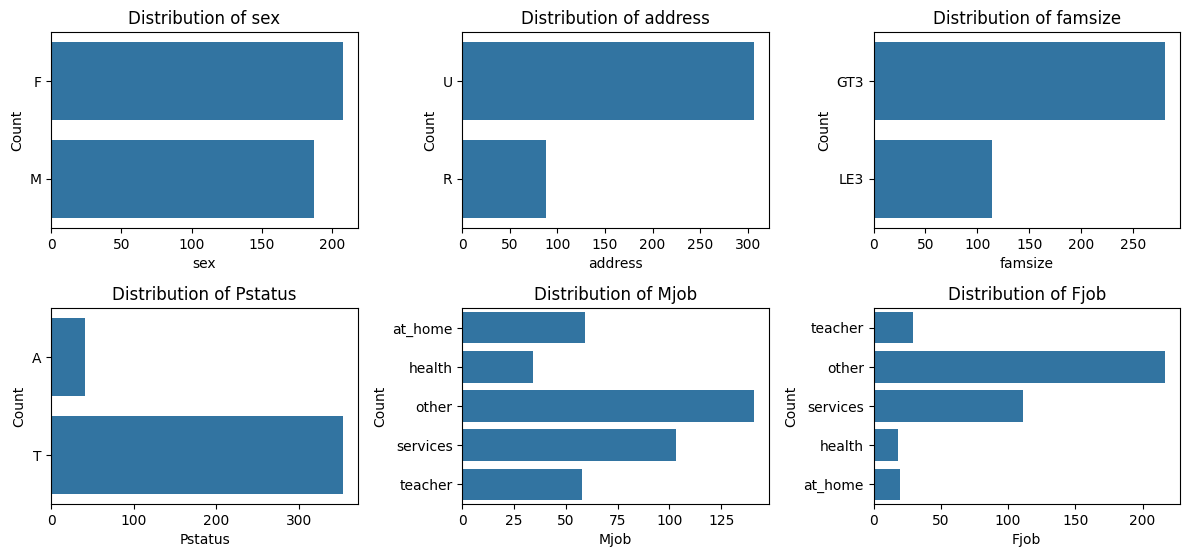

In [70]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob']):
    plt.subplot(3, 3, i+1)
    sns.countplot(data[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

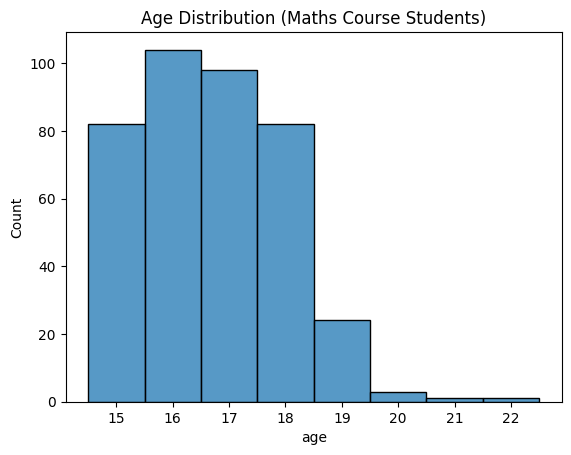

In [71]:
sns.histplot(data=data, x='age', bins=10, discrete=True)
plt.title("Age Distribution (Maths Course Students)")
plt.show()

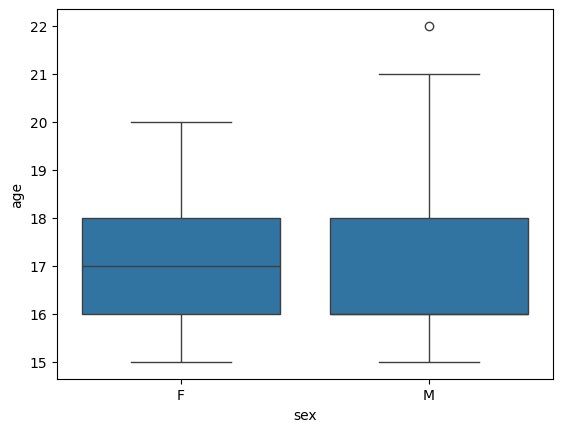

In [72]:
# Sex+Age Distribution
sns.boxplot(x='sex', y='age', data=data)
plt.show()


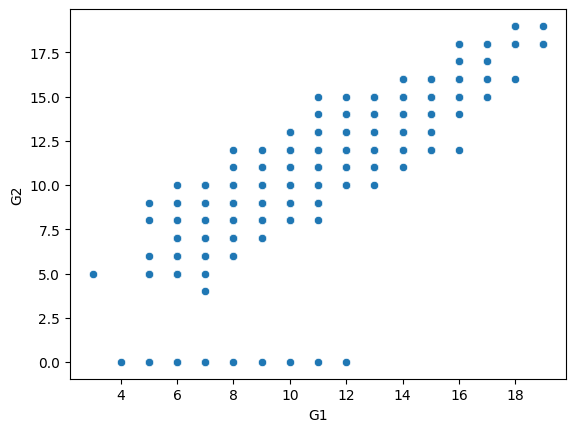

In [73]:
sns.scatterplot(x='G1', y='G2', data=data)
plt.show()

In [74]:
#MultiVariate Relationship

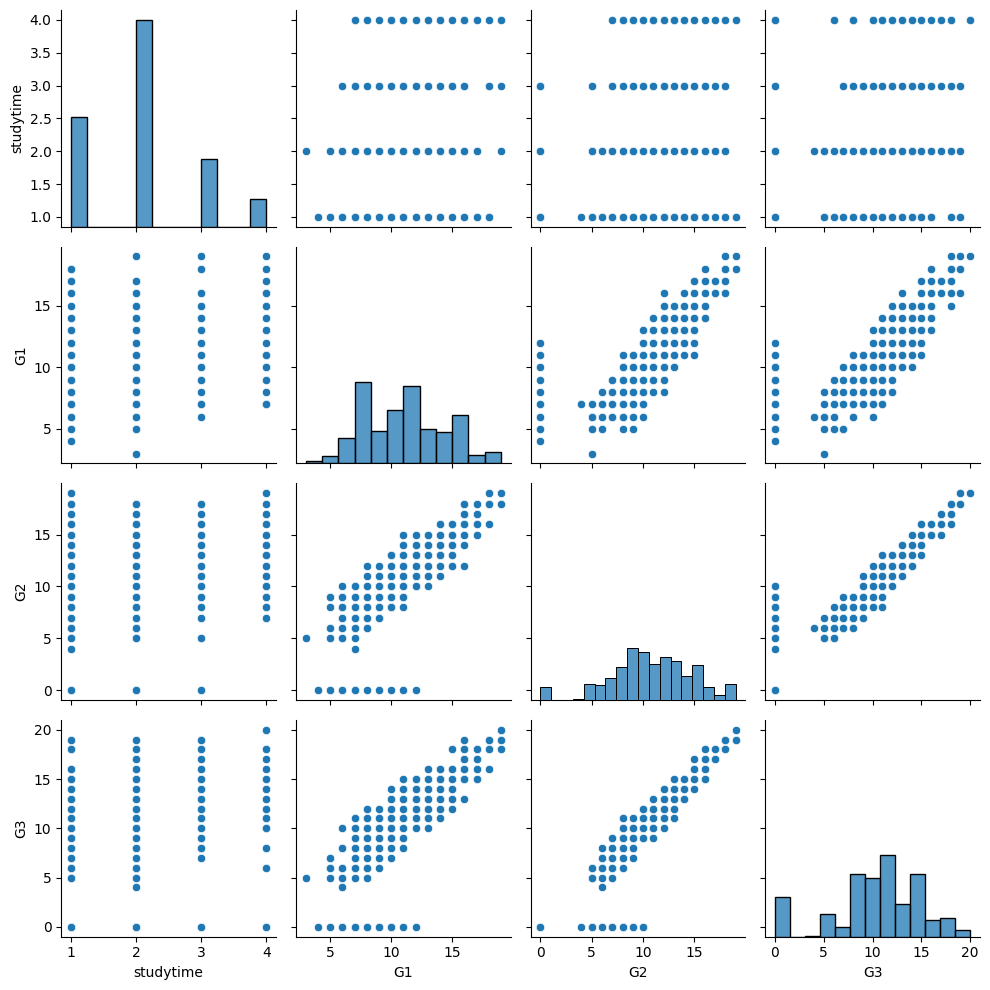

In [75]:
# Visualize relationships between multiple numeric variables
sns.pairplot(data[['studytime', 'G1', 'G2', 'G3']])
plt.tight_layout()
plt.show()

In [76]:
#Preprocessing the Dataset

In [77]:
#List of Columns to drop
columns_to_drop=["school","reason","traveltime","schoolsup","nursery","romantic","famrel","Dalc","Walc"]
data=data.drop(columns=columns_to_drop,axis=1)

In [78]:
data.columns

Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
       'Fjob', 'guardian', 'studytime', 'failures', 'famsup', 'paid',
       'activities', 'higher', 'internet', 'freetime', 'goout', 'health',
       'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [79]:
data = pd.get_dummies(data, columns = ['sex', 'address','Medu','Fedu','health','freetime','goout','studytime','failures', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
                                                      'guardian', 'famsup', 'paid', 'activities',
                                                       'higher','internet'])

In [80]:
data.head()

,age,absences,G1,G2,G3,sex_F,sex_M,address_R,address_U,Medu_0,...,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,higher_no,higher_yes,internet_no,internet_yes
0,18,6,5,6,6,True,False,False,True,False,...,True,False,True,False,True,False,False,True,True,False
1,17,4,5,5,6,True,False,False,True,False,...,False,True,True,False,True,False,False,True,False,True
2,15,10,7,8,10,True,False,False,True,False,...,True,False,False,True,True,False,False,True,False,True
3,15,2,15,14,15,True,False,False,True,False,...,False,True,False,True,False,True,False,True,False,True
4,16,4,6,10,10,True,False,False,True,False,...,False,True,False,True,True,False,False,True,True,False


In [81]:
data.columns

Index(['age', 'absences', 'G1', 'G2', 'G3', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'Medu_0', 'Medu_1', 'Medu_2', 'Medu_3', 'Medu_4', 'Fedu_0',
       'Fedu_1', 'Fedu_2', 'Fedu_3', 'Fedu_4', 'health_1', 'health_2',
       'health_3', 'health_4', 'health_5', 'freetime_1', 'freetime_2',
       'freetime_3', 'freetime_4', 'freetime_5', 'goout_1', 'goout_2',
       'goout_3', 'goout_4', 'goout_5', 'studytime_1', 'studytime_2',
       'studytime_3', 'studytime_4', 'failures_0', 'failures_1', 'failures_2',
       'failures_3', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother',
       'guardian_other', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes',
       'activities_no', 'activities_yes', 'higher_no', 'higher_yes',
       'internet_no', 'internet_yes'],
      dt

In [82]:
# Split data into features (X) and target variable (y)
X = data.drop('G3', axis=1)
y = data['G3']

In [83]:
X.columns

Index(['age', 'absences', 'G1', 'G2', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'Medu_0', 'Medu_1', 'Medu_2', 'Medu_3', 'Medu_4', 'Fedu_0',
       'Fedu_1', 'Fedu_2', 'Fedu_3', 'Fedu_4', 'health_1', 'health_2',
       'health_3', 'health_4', 'health_5', 'freetime_1', 'freetime_2',
       'freetime_3', 'freetime_4', 'freetime_5', 'goout_1', 'goout_2',
       'goout_3', 'goout_4', 'goout_5', 'studytime_1', 'studytime_2',
       'studytime_3', 'studytime_4', 'failures_0', 'failures_1', 'failures_2',
       'failures_3', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother',
       'guardian_other', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes',
       'activities_no', 'activities_yes', 'higher_no', 'higher_yes',
       'internet_no', 'internet_yes'],
      dtype='o

In [84]:
# Split data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
X_test.columns

Index(['age', 'absences', 'G1', 'G2', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'Medu_0', 'Medu_1', 'Medu_2', 'Medu_3', 'Medu_4', 'Fedu_0',
       'Fedu_1', 'Fedu_2', 'Fedu_3', 'Fedu_4', 'health_1', 'health_2',
       'health_3', 'health_4', 'health_5', 'freetime_1', 'freetime_2',
       'freetime_3', 'freetime_4', 'freetime_5', 'goout_1', 'goout_2',
       'goout_3', 'goout_4', 'goout_5', 'studytime_1', 'studytime_2',
       'studytime_3', 'studytime_4', 'failures_0', 'failures_1', 'failures_2',
       'failures_3', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother',
       'guardian_other', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes',
       'activities_no', 'activities_yes', 'higher_no', 'higher_yes',
       'internet_no', 'internet_yes'],
      dtype='o

In [86]:
X_test.values

array([[17, 2, 8, ..., False, False, True],
       [18, 3, 14, ..., False, False, True],
       [18, 8, 3, ..., True, False, True],
       ...,
       [15, 8, 9, ..., True, False, True],
       [15, 2, 15, ..., True, False, True],
       [17, 16, 6, ..., True, False, True]], dtype=object)

In [87]:
# Define and train the decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [88]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [89]:
# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)

print('Decision Tree Metrics:')
print(f'Mean Absolute Error (MAE): {mae}')
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f'R-Squared: {r_squared}')

Decision Tree Metrics:
Mean Absolute Error (MAE): 1.8987341772151898
Root Mean Squared Error (RMSE): 2.98
R-Squared: 0.5678742224861689


In [90]:
# Train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [91]:
# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

In [92]:
# Print the predictions
print("Predictions:", rf_y_pred)

Predictions: [ 8.23 12.03  6.57  9.3   8.61 13.37 18.64  6.86  6.31 12.78 15.36  7.32
 13.77 11.61 13.94  8.92  1.94 10.79 15.17  4.02 13.99 15.87 15.2   6.17
  7.5  18.58 10.26  9.6  17.86 10.69  8.17  8.17 15.63 13.21  2.51  6.12
  0.07 15.06 11.61  8.31  5.65 10.25 14.06  8.59 15.07  7.75 11.81 13.95
 13.16 15.26 13.36 15.42 10.46  8.29  5.65 13.29 10.66  1.61 15.52 15.85
 12.87  8.73  8.58  5.93  7.05 17.75  9.16  8.85  9.94 15.54  8.43  9.98
 13.32 18.39 10.7   6.01  8.61 14.41  5.74]


In [93]:
# Model Evaluation
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rf_r_squared = r2_score(y_test, rf_y_pred)

print('Random Forest Regression Metrics:')
print(f'Mean Absolute Error (MAE): {rf_mae}')
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f'R-Squared: {rf_r_squared}')

Random Forest Regression Metrics:
Mean Absolute Error (MAE): 1.1274683544303798
Root Mean Squared Error (RMSE): 2.98
R-Squared: 0.8409759236395462


In [94]:
# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [95]:
# Make predictions on the test set
linear_y_pred = linear_model.predict(X_test)

In [96]:
# Model Evaluation
linear_mae = mean_absolute_error(y_test, linear_y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
linear_r_squared = r2_score(y_test, linear_y_pred)

print('Linear Regression Metrics:')
print(f'Mean Absolute Error (MAE): {linear_mae}')
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f'R-Squared: {linear_r_squared}')

Linear Regression Metrics:
Mean Absolute Error (MAE): 1.7297324651404271
Root Mean Squared Error (RMSE): 2.98
R-Squared: 0.6961051599031818


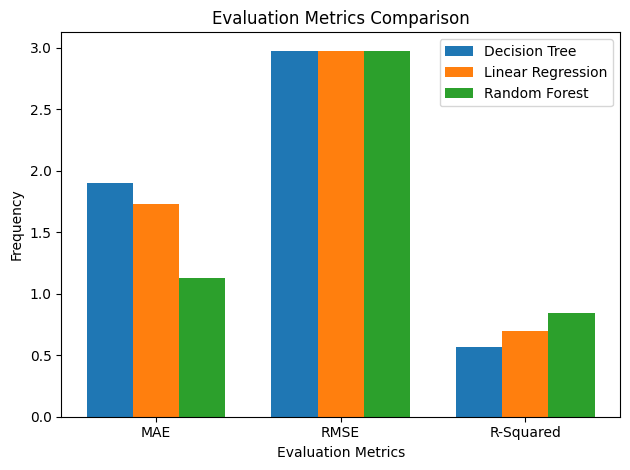

In [97]:
# Evaluation metrics for Decision Tree
dt_metrics = [mae, rmse, r_squared]

# Evaluation metrics for Linear Regression
lr_metrics = [linear_mae, rmse, linear_r_squared]

# Evaluation metrics for Random Forest
rf_metrics = [rf_mae, rmse, rf_r_squared]

# Define evaluation metric labels
metric_labels = ['MAE', 'RMSE', 'R-Squared']

# Define bar width
bar_width = 0.25

# Define x-axis positions for each group
x = np.arange(len(metric_labels))

# Plot grouped bars
plt.bar(x - bar_width, dt_metrics, width=bar_width, label='Decision Tree')
plt.bar(x, lr_metrics, width=bar_width, label='Linear Regression')
plt.bar(x + bar_width, rf_metrics, width=bar_width, label='Random Forest')

# Add labels and title
plt.xlabel('Evaluation Metrics')
plt.ylabel('Frequency')
plt.title('Evaluation Metrics Comparison')
plt.xticks(x, metric_labels)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [98]:
#Explain Predictions with SHAP
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

In [99]:
print(shap_values)

[[-1.42912247e-02  7.01945583e-01 -4.66895387e-02 ... -5.93039338e-03
   3.52846475e-03  5.96883979e-04]
 [-1.73627748e-02  3.05088864e-01  1.85563802e-01 ...  6.22659672e-03
  -7.32518896e-05  7.33752885e-04]
 [ 1.89706143e-02  1.92058431e+00 -1.18894421e-01 ...  6.54224805e-05
  -1.22028760e-04  3.01017674e-04]
 ...
 [ 3.76662134e-02  5.22197982e-01  2.17604752e-02 ...  1.53453710e-03
   2.74202722e-03 -1.34926030e-03]
 [ 8.06871410e-02  2.99138063e-01  1.34188884e-01 ...  8.34531227e-06
   8.86688496e-04  7.37918554e-04]
 [-1.84299991e-02  1.78193598e+00 -9.47388997e-02 ...  1.02501618e-04
   3.81665968e-04 -2.63659544e-03]]


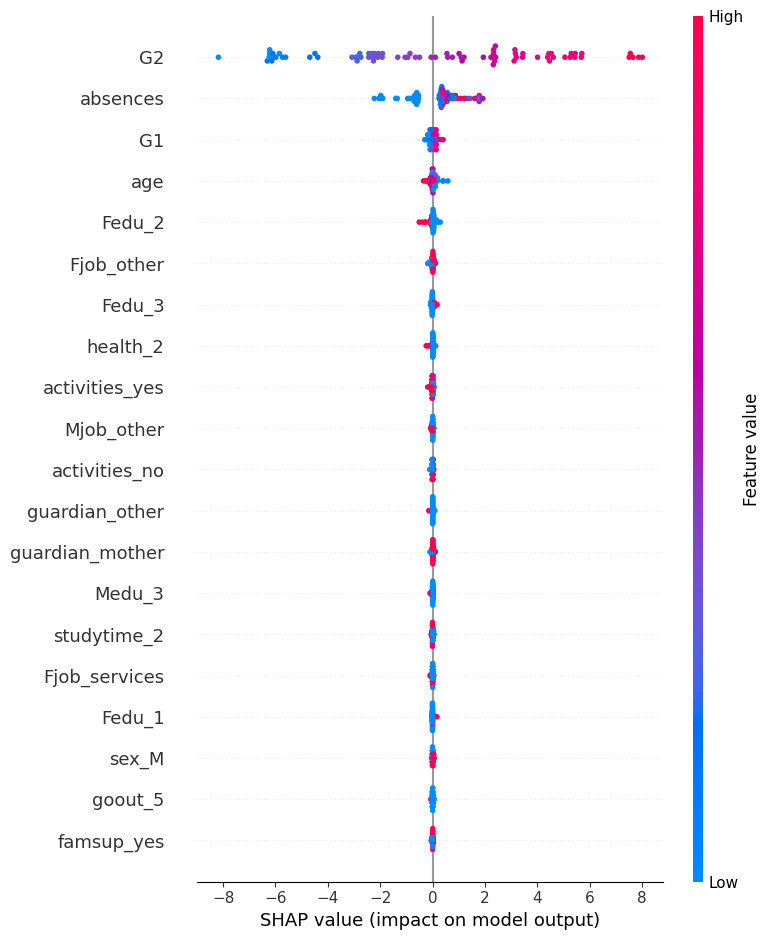

In [100]:
# Visualize global feature importance
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)  

In [101]:
# Save the random forest model to a pickle file
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [102]:
# Save the SHAP explainer to a pickle file
with open('explainer.pkl', 'wb') as file:
    pickle.dump(explainer, file)


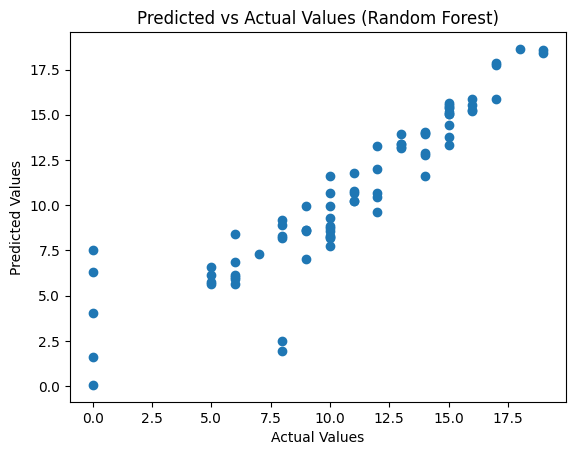

In [105]:
# Plot the predicted vs actual values
plt.scatter(y_test, rf_y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values (Random Forest)")
plt.show()

In [104]:
# prompt: refferring to the project give me the code for getting the accuracy of prediction from the random forest model

rf_accuracy = rf_model.score(X_test, y_test)
print(f'Random Forest Accuracy: {rf_accuracy}')


Random Forest Accuracy: 0.8409759236395462
